## Importing libraries
In this section, we import the necessary libraries required for data handling, statistics, time series analysis, and visualisations.

In [2]:
# Data Handling
import pandas as pd
import numpy as np

# Statistics
from scipy import stats

# Time series
import datetime as dt
import statsmodels.api as sm
from statsmodels. tsa. seasonal import seasonal_decompose

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading
In this section, we load the retail sales dataset into a pandas dataframe for analysis.

In [3]:
df = pd.read_csv ("C:/Users/USER/Downloads/retail_sales_dataset.csv")

## Data Cleaning
In this section, we will inspect, clean, and prepare the dataset for analysis.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,11/24/2023,CUST001,Male,34,Beauty,3,50,150
1,2,2/27/2023,CUST002,Female,26,Clothing,2,500,1000
2,3,1/13/2023,CUST003,Male,50,Electronics,1,30,30
3,4,5/21/2023,CUST004,Male,37,Clothing,1,500,500
4,5,5/6/2023,CUST005,Male,30,Beauty,2,50,100


In [7]:
df.shape

(1000, 9)

In [8]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [9]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [10]:
df.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

# Detecting outliers using a boxplot
In this step, I used a boxplot to visually inspect the distribution of the total amount and price per unit data. Since there are no dots outside the whiskers of the box, it indicates that there are no significant outliers in these columns.

<Axes: xlabel='Total Amount'>

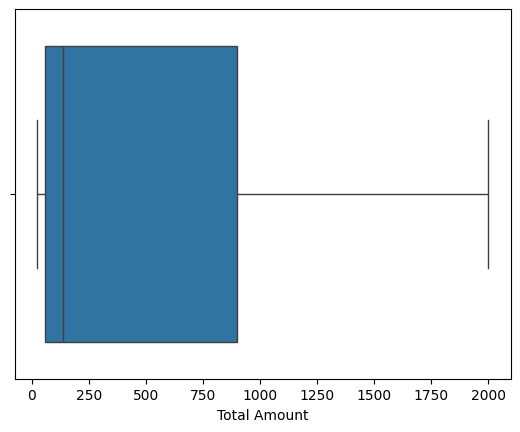

In [11]:
sns.boxplot(x=df['Total Amount'])

<Axes: xlabel='Price per Unit'>

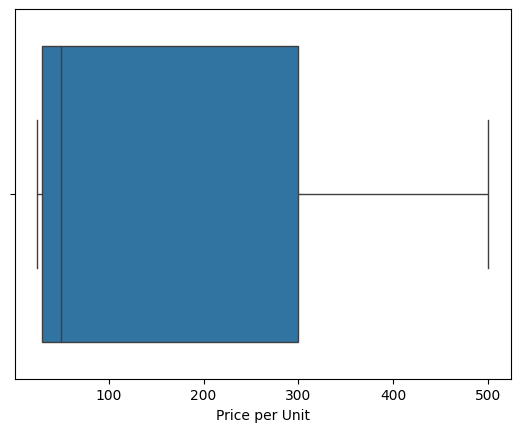

In [12]:
sns.boxplot(x=df['Price per Unit'])

# Converting Order Date to Datetime Format
I converted the 'Date' column to datetime format using 'pd.to_datetime()'. After the conversion, I confirmed it worked by checking the column data type and viewing the first few entries.

In [8]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [9]:
df['Date'].head()

0   2023-11-24
1   2023-02-27
2   2023-01-13
3   2023-05-21
4   2023-05-06
Name: Date, dtype: datetime64[ns]

# Checking Data Types
I used this step to confirm that each column in my dataset is in the correct format. By applying 'type' and counting the results, I verified whether the data values were stored as the expected types (such as strings, numbers, or dates).

In [15]:
df['Transaction ID'].apply(type).value_counts()

Transaction ID
<class 'int'>    1000
Name: count, dtype: int64

In [17]:
df['Date'].apply(type).value_counts()

Date
<class 'pandas._libs.tslibs.timestamps.Timestamp'>    1000
Name: count, dtype: int64

In [18]:
df['Customer ID'].apply(type).value_counts()

Customer ID
<class 'str'>    1000
Name: count, dtype: int64

In [21]:
df['Gender'].apply(type).value_counts()

Gender
<class 'str'>    1000
Name: count, dtype: int64

In [22]:
df['Age'].apply(type).value_counts()

Age
<class 'int'>    1000
Name: count, dtype: int64

In [23]:
df['Product Category'].apply(type).value_counts()

Product Category
<class 'str'>    1000
Name: count, dtype: int64

In [24]:
df['Quantity'].apply(type).value_counts()

Quantity
<class 'int'>    1000
Name: count, dtype: int64

In [25]:
df['Price per Unit'].apply(type).value_counts()

Price per Unit
<class 'int'>    1000
Name: count, dtype: int64

In [26]:
df['Total Amount'].apply(type).value_counts()


Total Amount
<class 'int'>    1000
Name: count, dtype: int64

# Saving the Cleaned Dataset
I saved my cleaned dataset as "cleaned_retail_sales.csv". Afterwards, I cross-checked with 'df.head()' to confirm that the cleaning changes were successfully reflected in the data.

In [27]:
df.to_csv("cleaned_retail_sales.csv", index=False)

In [22]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


## Descriptive Statistics
In this step, I generated summary statistics for all numerical columns. I also calculated the median and mode separately to understand the central tendency of each variable more clearly. This helps in identifying the data’s overall distribution, typical values, and potential deviations.

In [24]:
df.describe(include=[np.number])

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [27]:
df.select_dtypes(include=[np.number]).mode().iloc[0]

Transaction ID     1.0
Age               43.0
Quantity           4.0
Price per Unit    50.0
Total Amount      50.0
Name: 0, dtype: float64

In [28]:
df.select_dtypes(include=[np.number]).median()

Transaction ID    500.5
Age                42.0
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64

## Time Series Analysis
I began by checking the number of unique dates in the dataset to understand the time span covered by the sales data. Afterward, I analyzed sales trends across different time intervals — daily, weekly, and monthly — to observe performance patterns over time. Line charts were plotted for each period to visualize fluctuations, overall growth, and possible seasonal patterns in sales. This analysis provides insights into how sales evolve over time and helps identify consistent trends or irregular variations.

In [31]:
df['Date'].nunique()

345

# Sales by date (Daily Sales)

In [43]:
sales_trend = df.groupby('Date')['Total Amount'].sum()

In [44]:
sales_trend.head()

Date
2023-01-01    3600
2023-01-02    1765
2023-01-03     600
2023-01-04    1240
2023-01-05    1100
Name: Total Amount, dtype: int64

# Sales by week (Weekly Sales)

In [35]:
weekly_sales = df.resample('W', on='Date')['Total Amount'].sum()

In [39]:
weekly_sales.head()

Date
2023-01-01    3600
2023-01-08    6100
2023-01-15    4850
2023-01-22    8215
2023-01-29    9845
Freq: W-SUN, Name: Total Amount, dtype: int64

# Sales by month (Monthly Sales)

In [41]:
monthly_sales = df.resample('ME', on='Date')['Total Amount'].sum()

In [42]:
monthly_sales.head()

Date
2023-01-31    35450
2023-02-28    44060
2023-03-31    28990
2023-04-30    33870
2023-05-31    53150
Freq: ME, Name: Total Amount, dtype: int64

# Sales Trend Line Charts
The line charts below illustrate sales trends over daily, weekly, and monthly periods. These visualizations make it easier to compare short-term fluctuations with broader patterns, helping to identify periods of peak performance and possible seasonal variations.

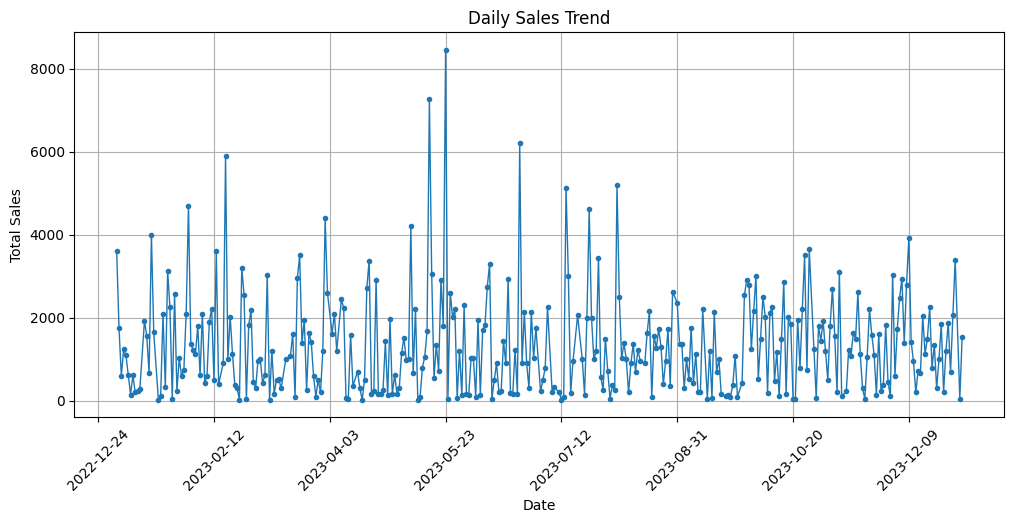

In [51]:
plt.figure(figsize=(12, 5))
plt.plot(sales_trend, marker='.', linewidth=1)
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10)) 
plt.show()

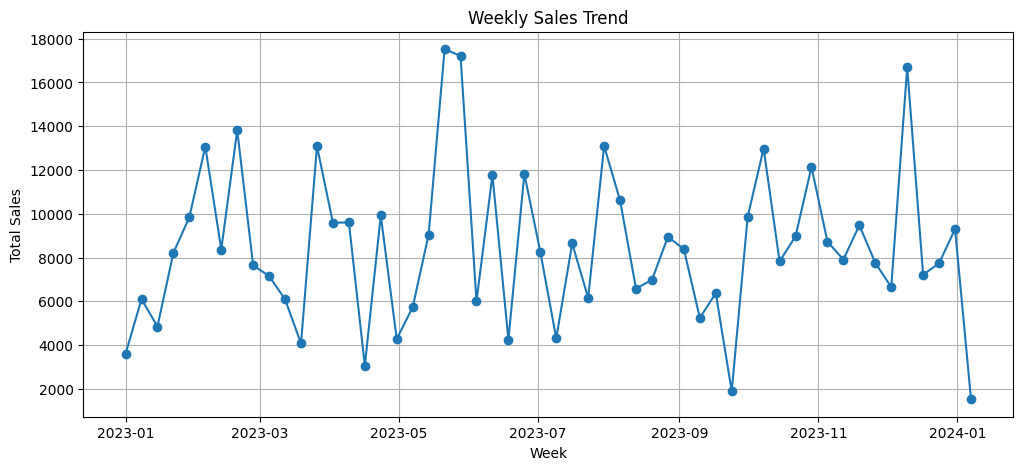

In [46]:
weekly_sales = df.resample('W', on='Date')['Total Amount'].sum()

plt.figure(figsize=(12, 5))
plt.plot(weekly_sales, marker='o')
plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

## Customer and Product Analysis
In this section, I examined customer demographics and purchasing behaviour to understand who the main buyers are and which products drive sales. I analyzed gender and age distributions to identify key customer segments and explored product category performance to determine the most profitable categories. I also compared purchasing patterns such as total quantity and spending across different age groups and genders. Finally, I visualized relationships using a heatmap to reveal correlations between factors like age and product category to analyze the average amount spent by each age group on various product categories. This analysis provides a clearer understanding of customer preferences and highlights the products contributing most to overall sales.

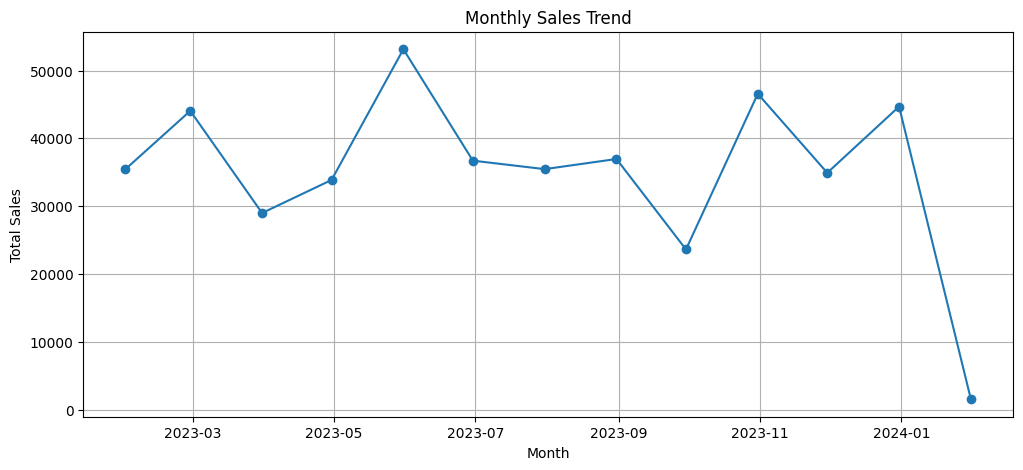

In [50]:
monthly_sales = df.resample('ME', on='Date')['Total Amount'].sum()

plt.figure(figsize=(12, 5))
plt.plot(monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [54]:
df['Gender'].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

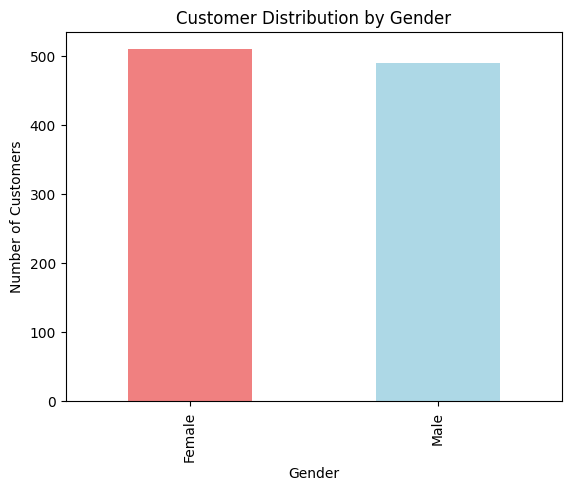

In [58]:
df['Gender'].value_counts().plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Customer Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

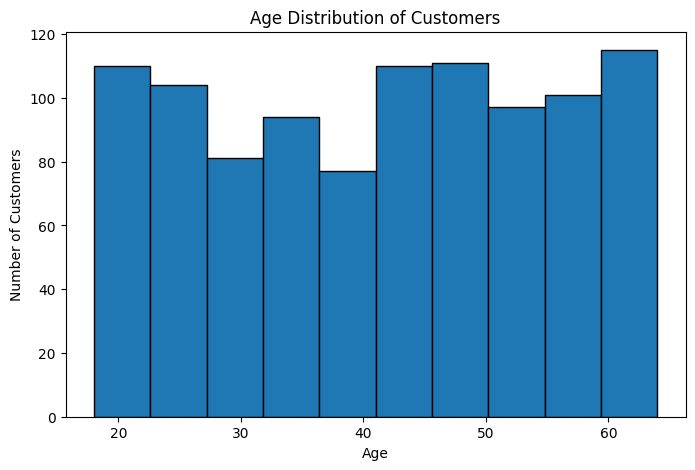

In [59]:
plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

In [60]:
df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64

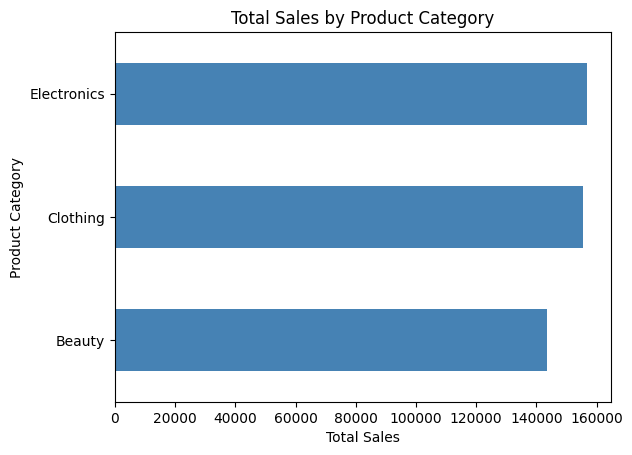

In [62]:
df.groupby('Product Category')['Total Amount'].sum().sort_values().plot(kind='barh', color='steelblue')
plt.title('Total Sales by Product Category')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.show()

In [64]:
df.groupby('Gender')['Total Amount'].sum()

Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64

In [66]:
bins = [0, 18, 30, 45, 60, 100]
labels = ['<18', '18-30', '31-45', '46-60', '60+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
df.groupby('Age_Group', observed=True)['Quantity'].sum()

Age_Group
<18       54
18-30    631
31-45    773
46-60    831
60+      225
Name: Quantity, dtype: int64

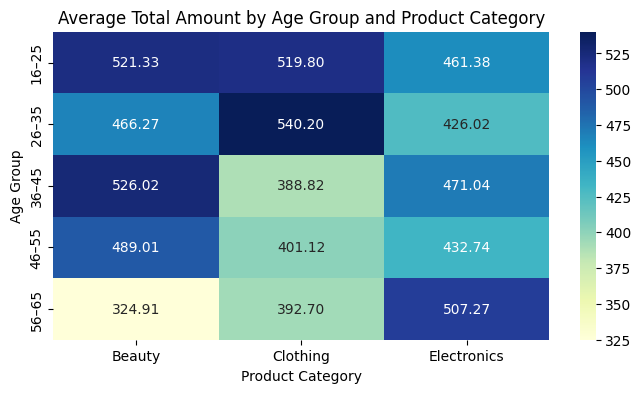

In [53]:
pivot = df.pivot_table(index='Age_Bin', columns='Product Category', values='Total Amount', aggfunc='mean', observed= False)
plt.figure(figsize=(8,4))
sns.heatmap(pivot, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Average Total Amount by Age Group and Product Category')
plt.ylabel('Age Group'); plt.xlabel('Product Category')
plt.show()

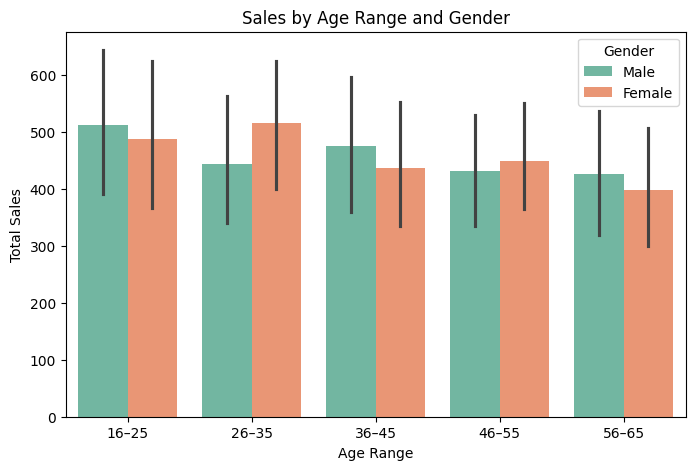

In [52]:
df['Age_Bin'] = pd.cut(df['Age'], bins=[15, 25, 35, 45, 55, 65], labels=['16–25', '26–35', '36–45', '46–55', '56–65'])
plt.figure(figsize=(8,5))
sns.barplot(x='Age_Bin', y='Total Amount', hue='Gender', data=df, palette='Set2')
plt.title('Sales by Age Range and Gender')
plt.xlabel('Age Range')
plt.ylabel('Total Sales')
plt.legend(title='Gender')
plt.show()

## Visualization

A series of visualizations were developed to uncover meaningful insights from the retail sales data. The line chart of daily sales with a 7-day moving average provided a clear view of short-term fluctuations and overall sales trends over time. Similarly, the month-over-month (MoM) percentage change line chart revealed patterns of growth and decline across different months, offering a deeper understanding of sales performance dynamics.  

The bar chart illustrating the frequency of total sales amounts highlighted how transactions were distributed across various sales ranges, indicating where the majority of customer purchases were concentrated.  

Finally, the heatmap of numerical features, including Age, Quantity, Price per Unit, and Total Amount, was used to examine potential correlations among key variables, helping to identify relationships between customer characteristics and purchasing behaviour.


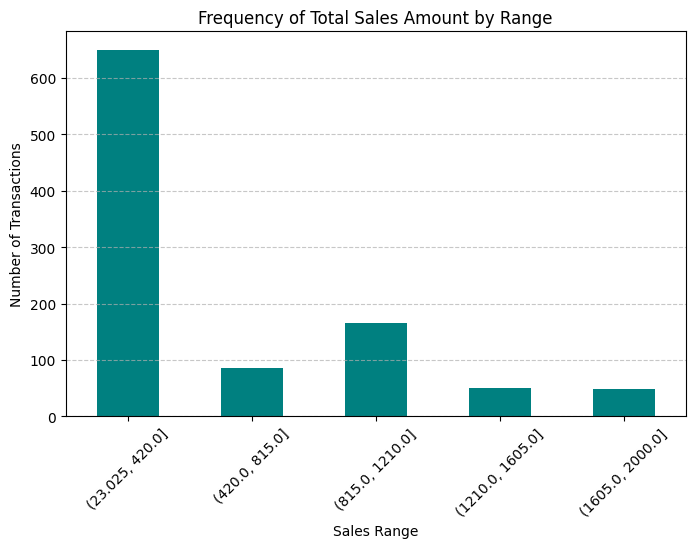

In [17]:
# Creating bins for Total Amount
bins = 5
df['Sales_Bin'] = pd.cut(df['Total Amount'], bins=bins)

# Grouping by the bins and counting how many transactions fall in each
sales_counts = df['Sales_Bin'].value_counts().sort_index()

# Plotting as a bar chart
plt.figure(figsize=(8,5))
sales_counts.plot(kind='bar', color='teal')
plt.title('Frequency of Total Sales Amount by Range')
plt.xlabel('Sales Range')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

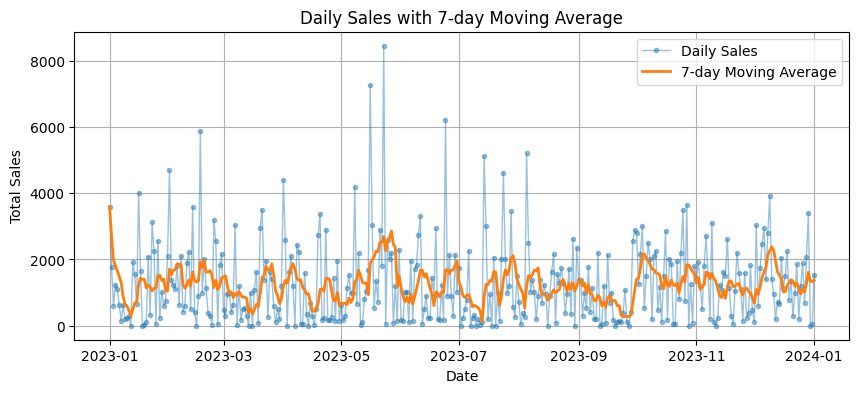

In [18]:
# Ensuring date column is datetime
df['order_date'] = pd.to_datetime(df['Date'], errors='coerce')

# Computing daily totals and 7-day moving average
daily = df.resample('D', on='Date')['Total Amount'].sum()
ma7 = daily.rolling(window=7, min_periods=1).mean()

# Plot
plt.figure(figsize=(10, 4))
plt.plot(daily.index, daily.values, alpha=0.45, label='Daily Sales', marker='.', linewidth=1)
plt.plot(ma7.index, ma7.values, label='7-day Moving Average', linewidth=2)
plt.title('Daily Sales with 7-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()

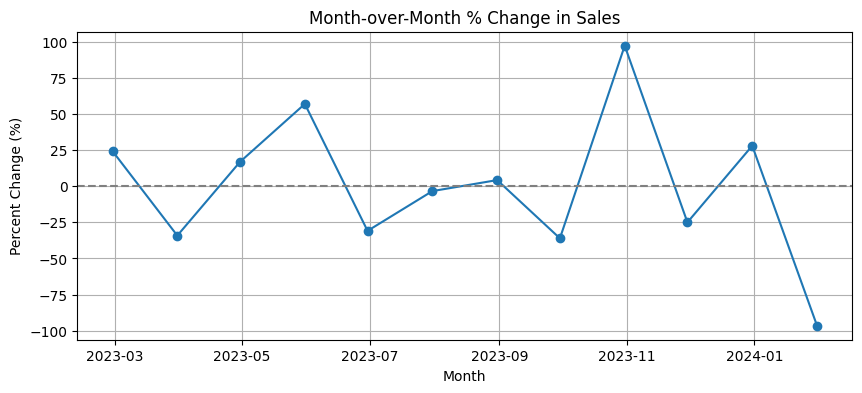

In [19]:
# Computing monthly totals and month-over-month % change
monthly = df.resample('ME', on='Date')['Total Amount'].sum()
mom = monthly.pct_change().mul(100)  # convert to percentage

# Plot
plt.figure(figsize=(10, 4))
plt.plot(mom.index, mom.values, marker='o')
plt.axhline(0, color='gray', linestyle='--')  # reference line at 0%
plt.title('Month-over-Month % Change in Sales')
plt.xlabel('Month')
plt.ylabel('Percent Change (%)')
plt.grid(True)
plt.show()

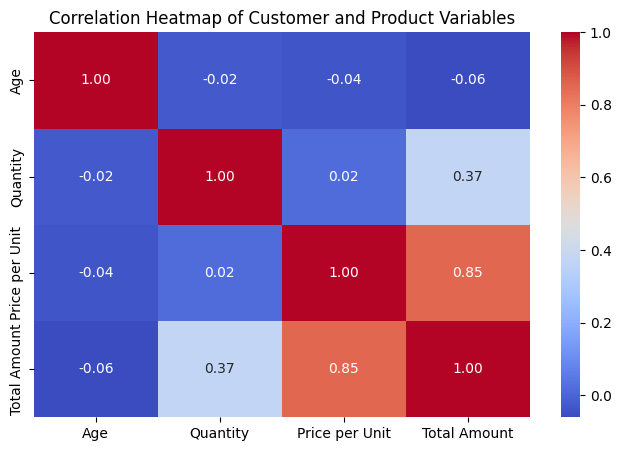

In [11]:
corr = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Customer and Product Variables')
plt.show()

#  Recommendations
Based on the exploratory data analysis, these are the insights that can guide strategic decisions to improve retail performance and strengthen customer engagement.

1. Sales Optimisation and Growth Patterns 
   The time series analysis revealed consistent sales activity across the observed period, with noticeable variations between weeks and months. While daily sales fluctuated moderately, the monthly trend suggested periodic growth phases followed by slight declines. This indicates that the business could benefit from identifying high-performing months and replicating their sales strategies — such as targeted promotions, product bundling, or special offers — during lower-performing periods to stabilise revenue flow.

2. Customer Segmentation and Targeting
   The demographic analysis showed that both gender groups actively contribute to total sales, with noticeable spending patterns across different age ranges. Customers between 16-25 and 26-35 years emerged as a key demographic with strong purchasing behaviour. Marketing efforts should therefore focus on this segment through personalised campaigns, loyalty programmes, or social media engagement. At the same time, lighter engagement from older customers (above 55 years) suggests an opportunity to design special offers or incentives to encourage their participation.

3. Product Performance and Inventory Management
   The product category analysis identified distinct variations in total revenue contribution. Management should continue to invest in top-selling categories while reviewing low-performing ones to determine whether pricing, visibility, or product relevance is the limiting factor. Aligning inventory levels with demand trends — especially during peak periods identified in the sales trend analysis — will help minimise overstocking and stockouts.

4. Pricing and Spending Patterns
   The distribution of total sales amounts indicated that most transactions occur within a moderate price range, suggesting that customers are generally price-sensitive. Offering value-based discounts or mid-tier bundles can drive higher sales volume without significantly reducing profit margins. Additionally, cross-selling complementary products within similar price ranges can encourage customers to increase basket size per transaction.

5. Operational and Strategic Insights
   The correlation analysis showed positive relationships between total sales amount, quantity purchased, and price per unit, implying that increases in purchase volume and pricing directly influence revenue growth. This suggests an opportunity to experiment with small, strategic price adjustments on high-demand products. Furthermore, leveraging time-based promotions (such as weekend or month-end sales) could help maintain consistent engagement and reduce sales dips during slower periods.

 Overall Recommendation
To sustain growth and improve profitability, the business should:
- Focus on strengthening sales strategies during off-peak periods.  
- Deepen engagement with the 16-25 and 26-35 age groups while expanding appeal to older customers.  
- Optimise inventory and pricing strategies for high-demand products.  
- Use customer insights to design personalised marketing initiatives that reflect evolving purchase patterns.  

By applying these data-driven insights, management can enhance sales consistency, improve customer satisfaction, and ultimately increase overall profitability.